### Batch: CODSOFT June 2023

### Data Science Internship

### Task 3: Iris Flower Classification

#### Intern: Khushboo Singh

### Business Case: Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

In [1]:
# Importing necessary Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
data=pd.read_csv("Iris.csv")

### Basic checks

In [3]:
# First five rows
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [4]:
# Last five rows 
data.tail()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2
149,149,5.9,3.0,5.1,1.8,2


In [5]:
# Shape of data
data.shape

(150, 6)

* Dataset contains 6 columns with 150 rows.

In [6]:
# Columns in data
data.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'target'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   target        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [8]:
# Statistics of data
data.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Missing values in data
data.isnull().sum()

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

* No missing values present in data.

In [10]:
data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### Exploratory Data Analysis

In [11]:
df=data.drop("Unnamed: 0",axis=1)

In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

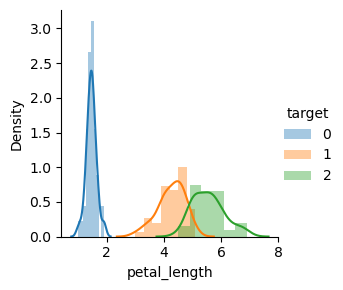

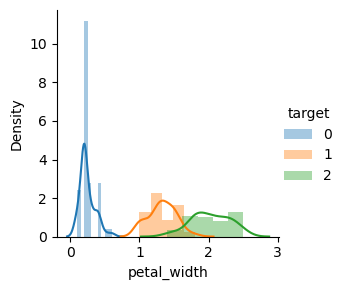

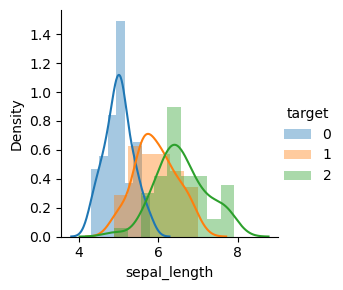

In [13]:
sns.FacetGrid(df,hue="target",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="target",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="target",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

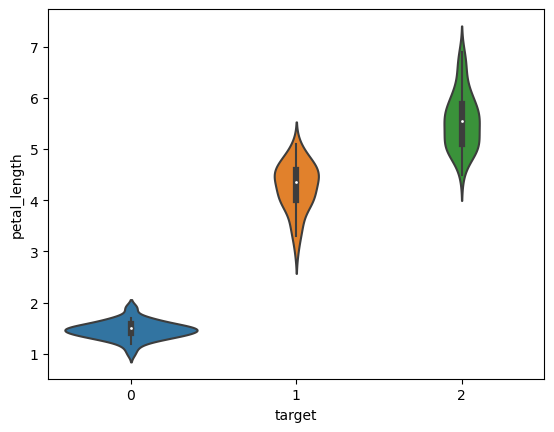

In [14]:
sns.violinplot(x="target",y="petal_length",data=df)
plt.show()

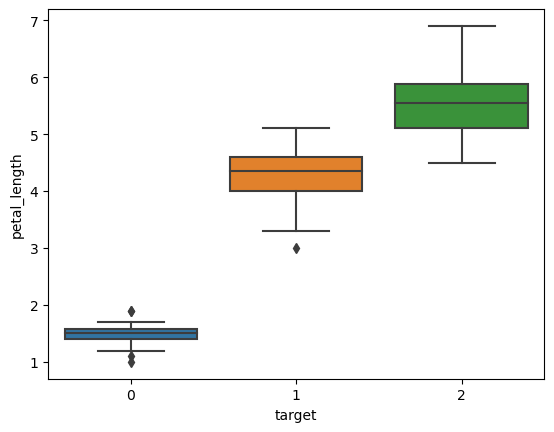

In [15]:
sns.boxplot(x="target",y="petal_length",data=df)
plt.show()

### Pair plot

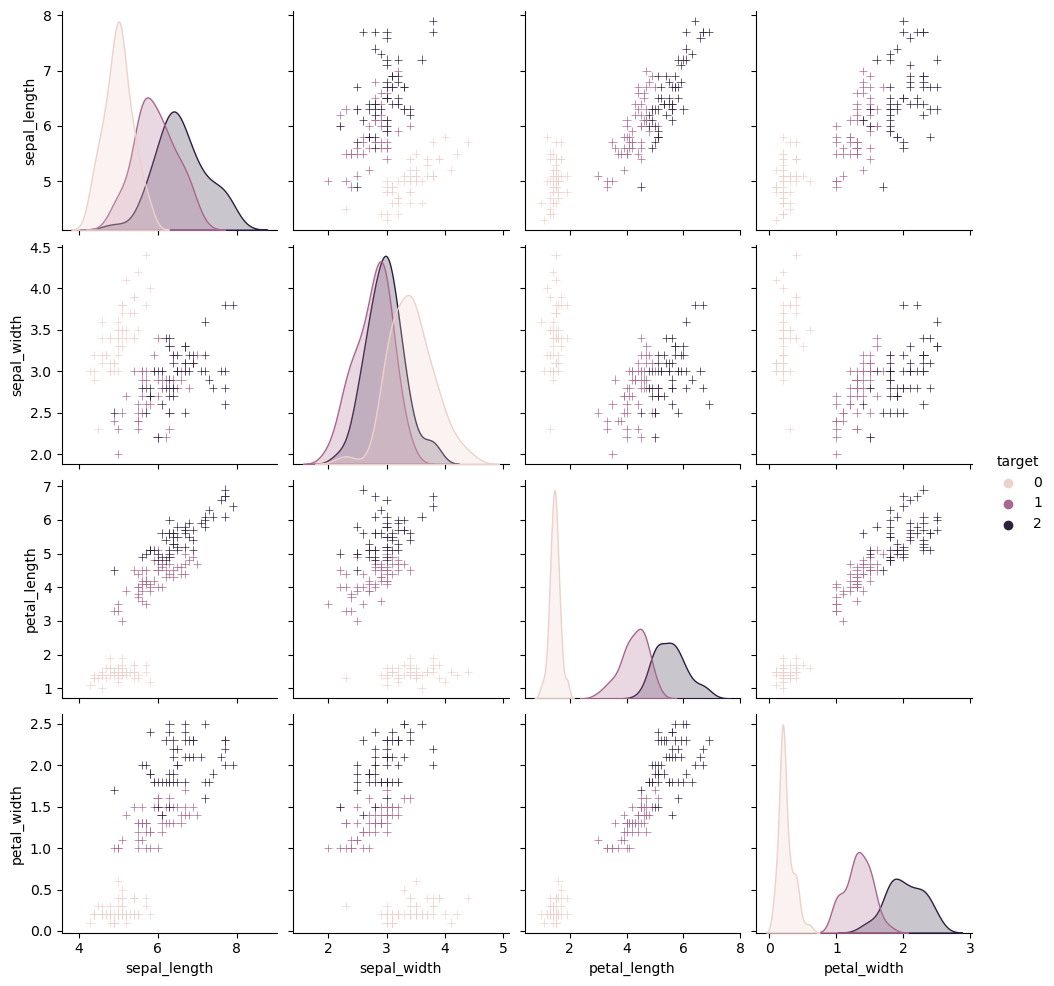

In [16]:
sns.pairplot(df,hue='target',markers='+')
plt.show()

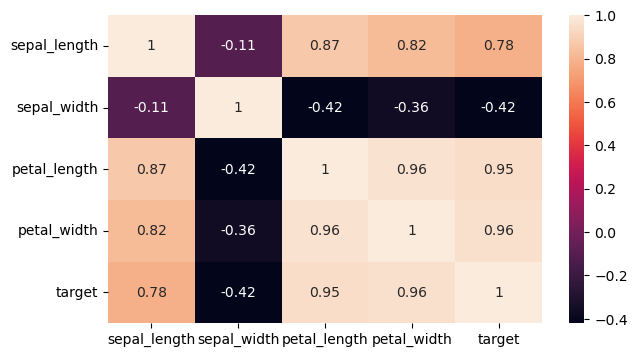

In [17]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True)
plt.show()

### Model Creation

In [18]:
## Creating Dependent & Independent Features
x=df.drop('target',axis=1)
y=df.target

In [19]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30, 4), (120, 4), (30,), (120,))

### Logistic Regression

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [22]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
prediction=lr.predict(x_test)

In [24]:
print('The accuracy of the Logistic Regression is',accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9666666666666667


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.92      0.95        39
           2       0.93      0.97      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('The accuracy of the SVM is:',accuracy_score(pred,y_test))

The accuracy of the SVM is: 0.9333333333333333


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.86      0.95      0.90        39
           2       0.94      0.84      0.89        38

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print('The accuracy of the Decision Tree is:',accuracy_score(dt_pred,y_test))

The accuracy of the Decision Tree is: 0.9333333333333333


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.87      0.89        39
           2       0.88      0.92      0.90        38

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



### K-Nearest Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('The accuracy of the K-Nearest Neighbours is:',accuracy_score(knn_pred,y_test))

The accuracy of the K-Nearest Neighbours is: 0.9666666666666667


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.97      0.95        39
           2       0.97      0.92      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Bagging Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
bc_pred=bc.predict(x_test)
print('The accuracy of the bagging classifier is:',accuracy_score(bc_pred,y_test))

The accuracy of the bagging classifier is: 0.9333333333333333


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, bc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.87      0.89        39
           2       0.88      0.92      0.90        38

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



### Conclusion:

Out of all the above models, Logistic Regression and K Nearest Neighbors has the highest accuracy score.